# Examen Segundo Parcial (Práctico)
### Laboratorio de Aprendizaje Estadístico

José Armando Melchor Soto  | 745697

--- 




### Librerías: 

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import warnings
import numpy as np
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import discriminant_analysis, neighbors
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

---

### Dataset : 
Recursos Humanos

In [2]:
df = pd.read_csv('hr_role.csv')

### Visualización y Limpieza del Dataset 

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_satisfied
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,80,0,8,0,1,6,4,0,5,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,80,1,10,3,3,10,7,1,7,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,80,0,7,3,3,0,0,0,0,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,80,0,8,3,3,8,7,3,0,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,80,1,6,3,3,2,2,2,2,False


#### Dummies

In [4]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,5993,19479,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,5130,24907,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,2090,2396,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,2909,23159,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,3468,16632,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,2571,12290,...,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,4,42,2,3,9991,21457,...,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,2,87,4,2,6142,5174,...,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,4,63,2,2,5390,13243,...,False,False,False,False,False,True,False,True,False,False


### Explicación de las variables

#### **Datos Personales**

`Age`: Edad del empleado.  

`Gender`: Género del empleado.

`MaritalStatus`: Estado civil del empleado.

`Department`: Departamento en el que trabaja.

`JobRole`: Cargo dentro de la empresa.

`Education`: Nivel de educación en una escala.

`EducationField`: Área de estudio del empleado.


#### **Trabajo**
`BusinessTravel`: Frecuencia de viajes de negocios.

`DistanceFromHome`: Distancia en kilómetros entre el hogar y la empresa.  

`JobLevel`: Nivel del puesto dentro de la jerarquía.

`MonthlyIncome`: Ingreso mensual en moneda local.  

`StockOptionLevel`: Nivel de opciones sobre acciones.

`TotalWorkingYears`: Años totales de experiencia laboral.  

`YearsAtCompany`: Años que lleva en la empresa.  

`YearsInCurrentRole`: Años en su rol actual.  

`YearsSinceLastPromotion`: Años desde la última promoción.  

`YearsWithCurrManager`: Años con su actual gerente.  

#### **Satisfacción y Rendimiento**

`Attrition`: Indica si el empleado ha renunciado.

`EnvironmentSatisfaction`: Satisfacción con el ambiente de trabajo.

`JobInvolvement`: Nivel de involucramiento en el trabajo.

`PerformanceRating`: Evaluación de desempeño.  

`RelationshipSatisfaction`: Satisfacción con relaciones laborales. .

`WorkLifeBalance`: Equilibrio entre trabajo y vida personal.

`is_satisfied`: Indica si el empleado está satisfecho en su trabajo. 


---

In [5]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'is_satisfied', 'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Direc

#### Se busca predecir si el empelado está satisfecho


In [6]:
target= 'Attrition_Yes'

#### NaN's

In [7]:
pd.DataFrame(df.isnull().sum()).T

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ninguna Variable tiene NaN's , así que podemos continuar

### **Funciones**

Definimos las funciones a utilizar

---

#### Función Calibración 

In [8]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
    gropuped = df_calibracion.groupby('bins').mean()
    
    plt.plot(gropuped.predicciones, gropuped.y, label="Modelo", marker="o")
    plt.plot(gropuped.predicciones, gropuped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

##### Función Bivariado

In [9]:
def bivariado(df):
    num_features = df.iloc[:, :].columns
    df_numerical = df.iloc[:, :].copy()

    for feature in num_features:
        df_numerical[f'{feature}_bins'] = pd.qcut(df_numerical[feature], q=5, labels=False, duplicates='drop')

        if df_numerical[f'{feature}_bins'].isna().sum() > 0:
            print(f"Advertencia: {feature} tiene valores NaN en la segmentación.")

        grouped = df_numerical.groupby(f'{feature}_bins').mean()

        fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
        
        sns.lineplot(x=grouped[feature], y=grouped[target], marker='o', color='#b30000', ax=axes[0])
        axes[0].set_title(f'Relación de {feature} con {target}')
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel(target)
        axes[0].grid()

        sns.histplot(df_numerical[feature], bins=50, color='#b30000', edgecolor='black', kde=True, ax=axes[1])
        axes[1].set_title(f'Distribución de {feature}')
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel('Frecuencia')

        plt.show()


---

#### Bivariado

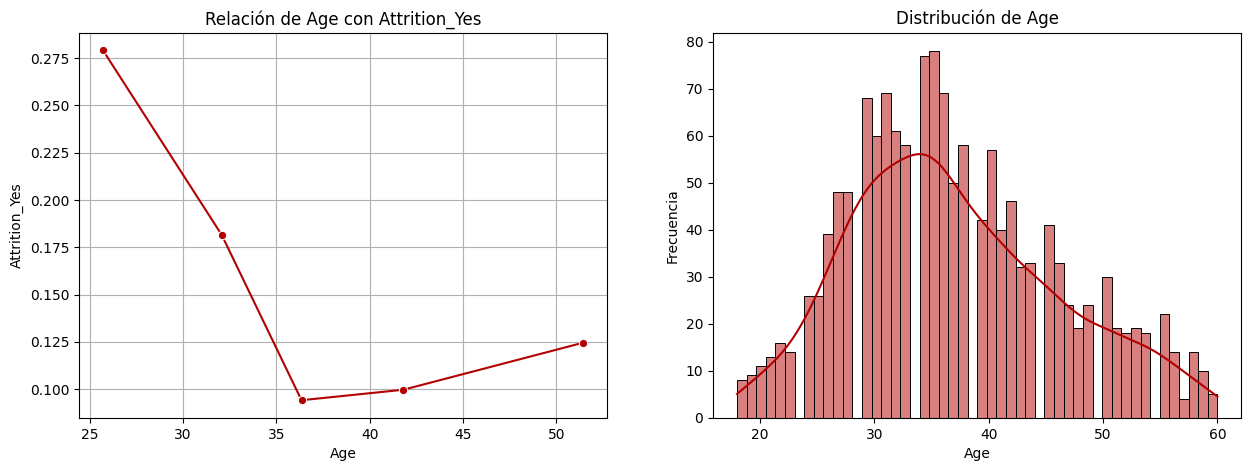

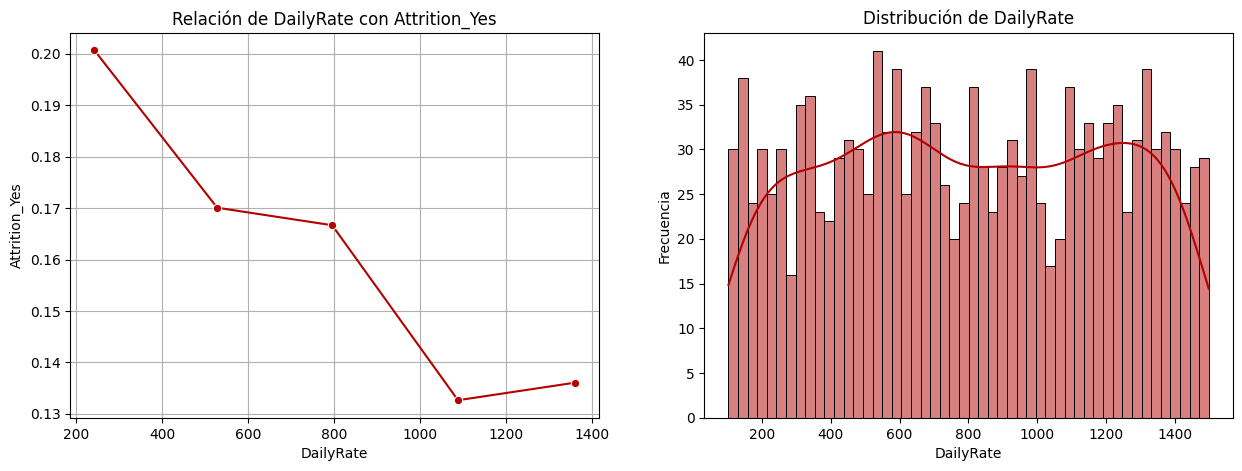

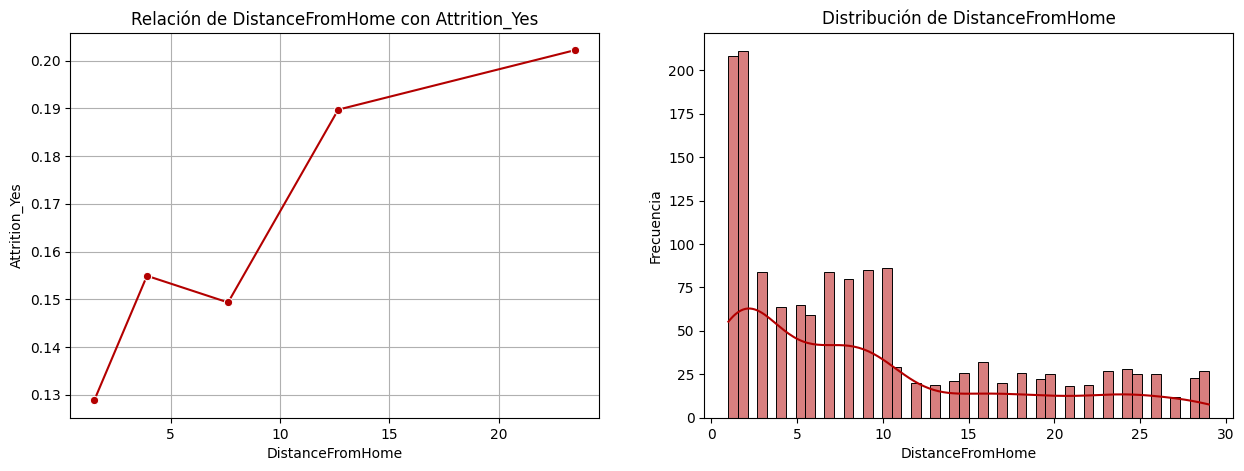

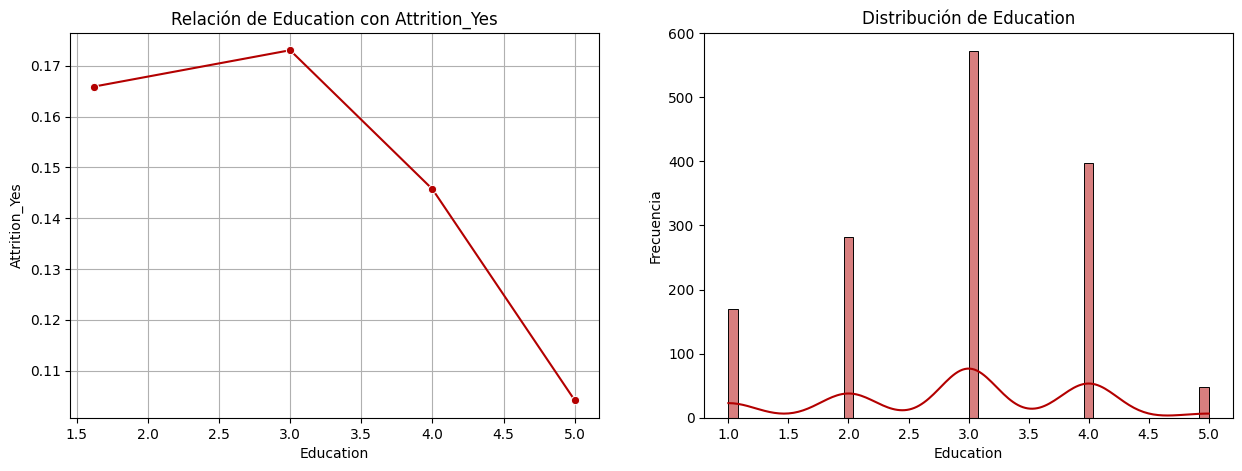

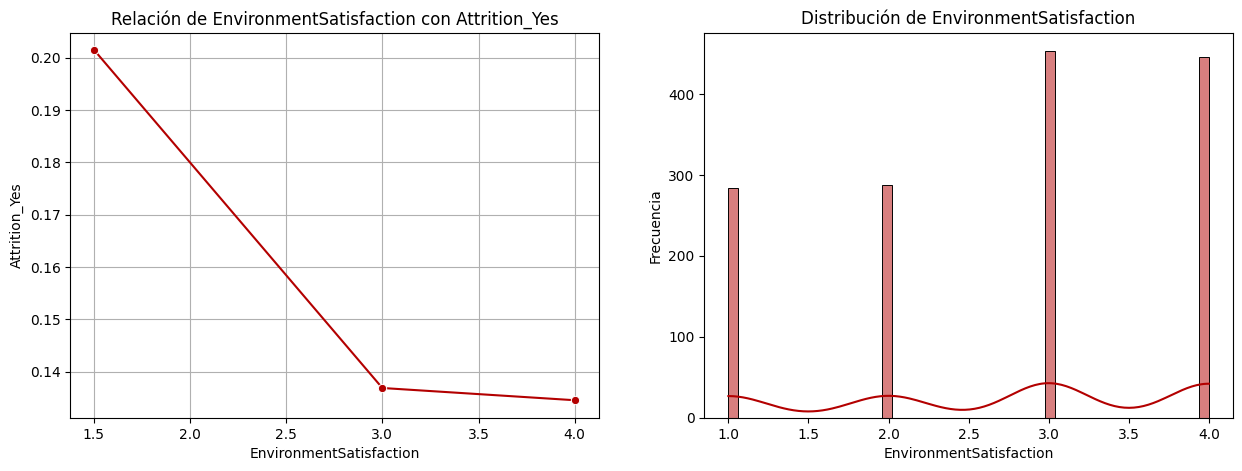

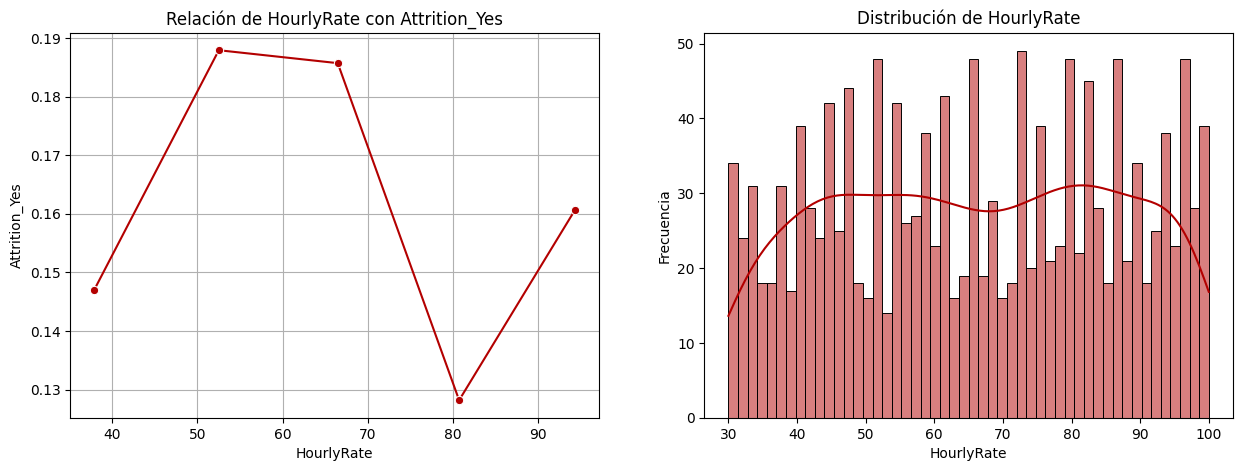

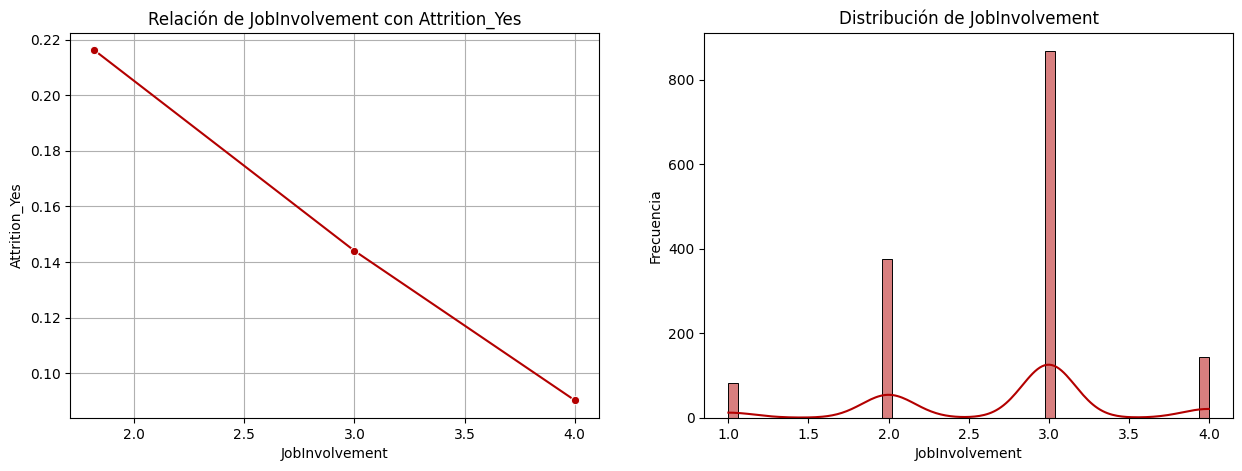

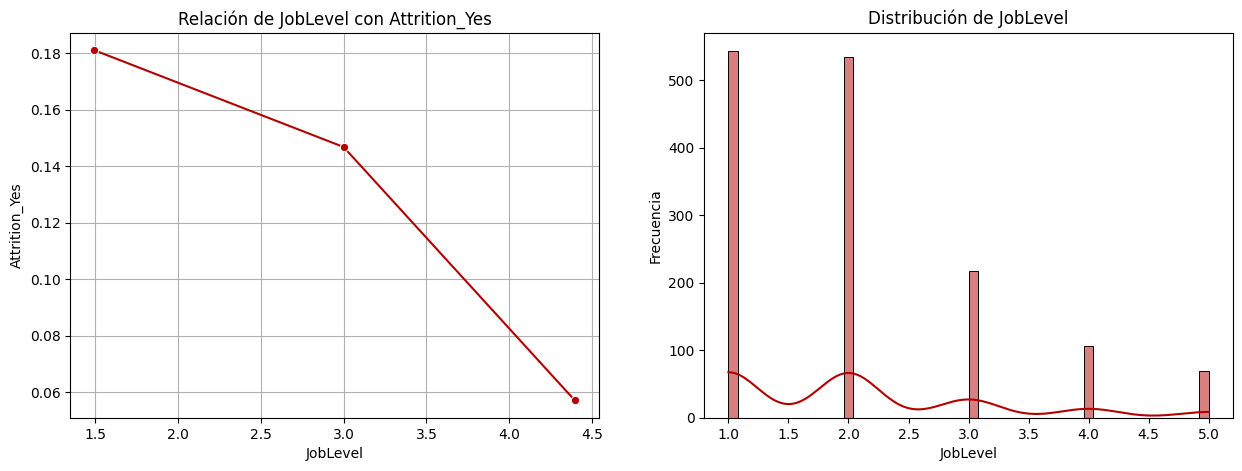

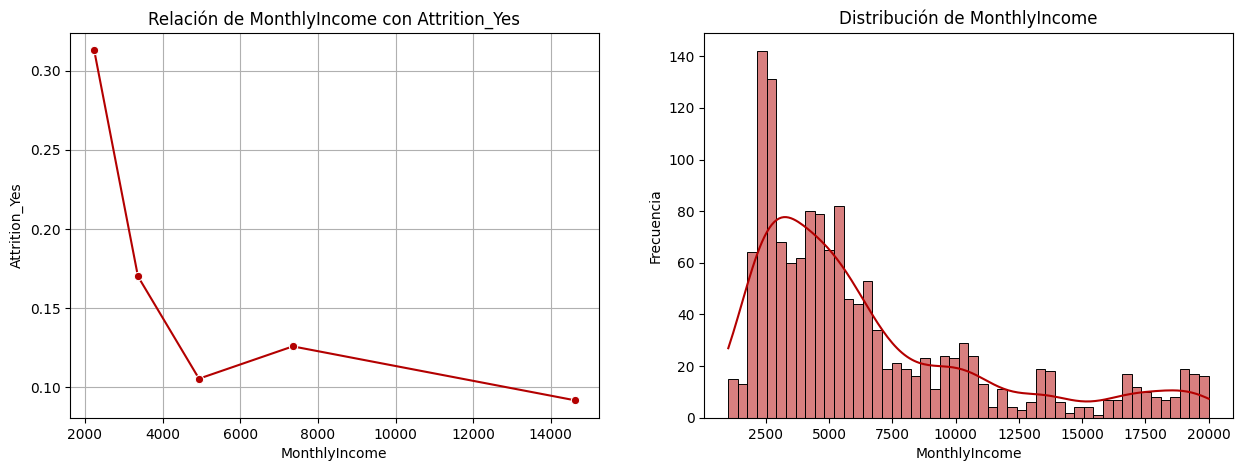

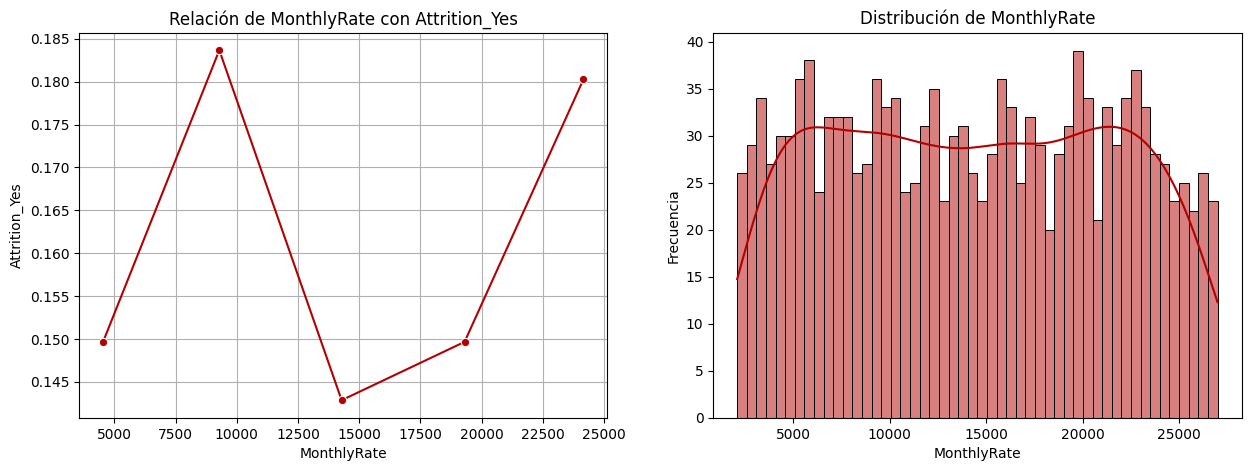

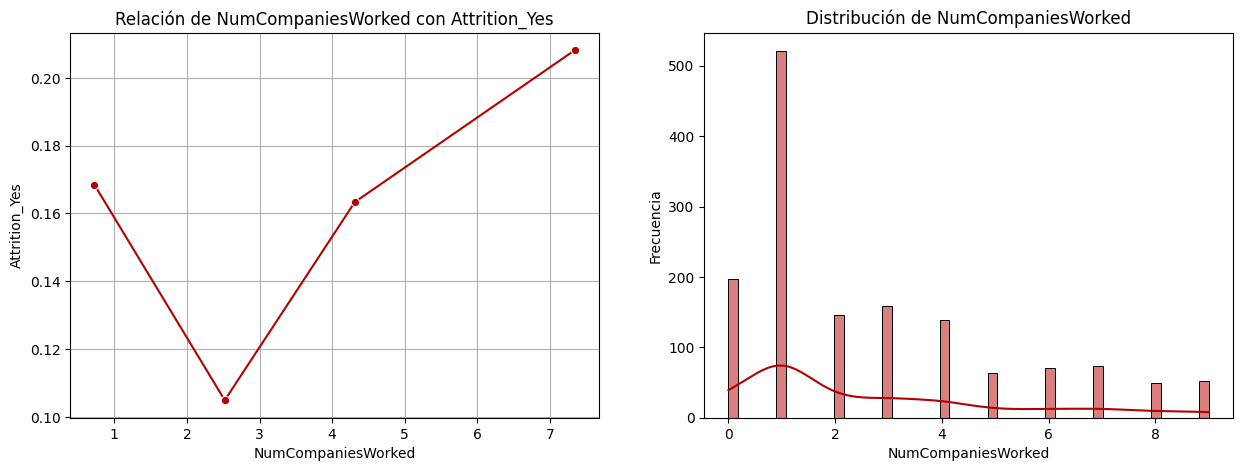

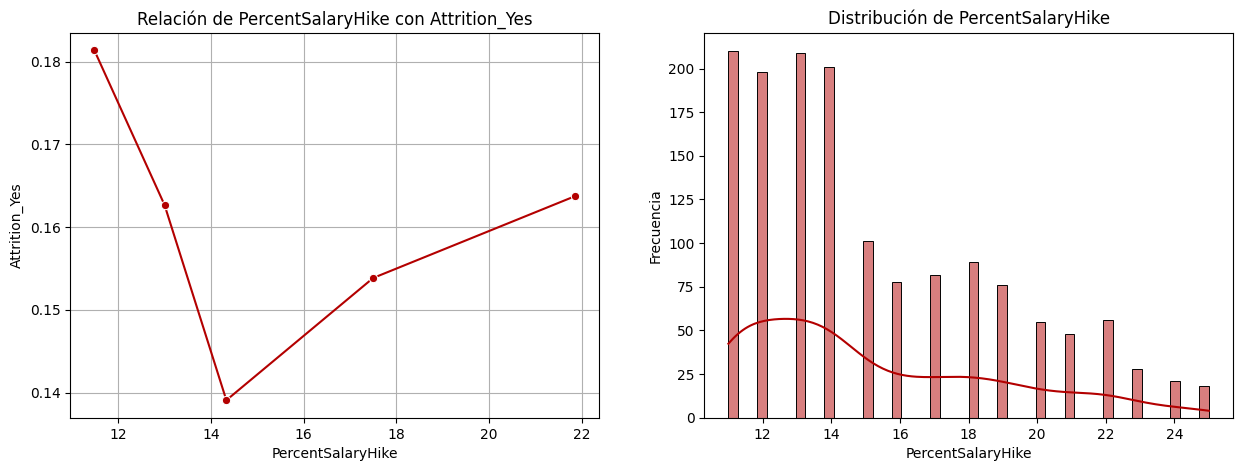

KeyboardInterrupt: 

In [10]:
bivariado(df)

#### Correlación

In [143]:
df.corr()['is_satisfied'].sort_values(ascending=False).head()

is_satisfied                    1.000000
EducationField_Life Sciences    0.044076
PercentSalaryHike               0.042461
Gender_Male                     0.040752
OverTime_Yes                    0.039452
Name: is_satisfied, dtype: float64

Con el análisis bivariado y la correlación, se puede observar la relación entre el objetivo y las distintas variables del DataFrame. Al realizar esta evaluación, se identifica que la variable que muestra la relación más fuerte con el objetivo es `EducationField_Life Sciences`, seguida por `PercentSalaryHike` y `Gender_Male`. Estos resultados sugieren que estas variables tienen un impacto significativo en el comportamiento del objetivo, lo que puede ser útil para la toma de decisiones o para modelar el comportamiento de la variable objetivo.

#### CrossValidation 

Se pide que el modelo tenga: 

test set: 20%
random_state: 42

In [144]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Escalamiento

In [145]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Modelos**

#### **KNN Clasificador**
---

In [146]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param = {
    'knn__n_neighbors': np.arange(1,200), 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'] 
}


##### - Random Search

In [147]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param, n_iter=1000, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)


random_search.best_params_
probabilidades_knn = random_search.predict_proba(X_test)[:, 1]

print(random_search.best_params_)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 796 is smaller than n_iter=1000. Running 796 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'knn__weights': 'uniform', 'knn__n_neighbors': np.int64(36), 'knn__metric': 'euclidean'}


##### - Gridsearch

In [148]:
grid_search = GridSearchCV(pipeline, param, cv=5, n_jobs=-1, scoring='roc_auc')

grid_search.fit(X_train, y_train)

probabilidades_knn2 = grid_search.predict_proba(X_test)[:, 1]

print(random_search.best_params_)

{'knn__weights': 'uniform', 'knn__n_neighbors': np.int64(36), 'knn__metric': 'euclidean'}


#### **Regresión Logística**
---

In [149]:
# Pipeline 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500, random_state=42))
])

params_grid= {
    'poly__degree': [1, 2, 3],
    'logreg__C': ['l2', None],
    'logreg__C': [0.01,0.1,1]
}

##### RandomSearch


In [150]:
log_reg_random= RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=5, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_random.fit(X_train, y_train)

probabilidades_logisticarandom = log_reg_random.best_estimator_.predict_proba(X_test)[:,1]

print(log_reg_random.best_params_)

{'poly__degree': 2, 'logreg__C': 1}


##### - Gridsearch

In [151]:
log_reg_grid= GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

probabilidades_logisticagrid = log_reg_grid.best_estimator_.predict_proba(X_test)[:,1]

print(log_reg_grid.best_params_)

{'logreg__C': 0.1, 'poly__degree': 2}


#### **Red Neuronal**

---

In [152]:
# Pipeline
pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier())
])

params= {
    'nn__hidden_layer_sizes': [(100,100),(100,100,100),(100,100,100,100)], 
    'nn__activation':['relu', 'tanh', 'logistic'],
    'nn__alpha': [0.01,0.1,1],
}

##### - RandomSearch

In [153]:

neuro_random = RandomizedSearchCV(estimator=pipeline, param_distributions=params, n_iter=5, cv=5, n_jobs=-1, scoring='roc_auc')
neuro_random.fit(X_train, y_train)

probabilidades_neurorandom = neuro_random.best_estimator_.predict_proba(X_test)[:, 1]

##### - Gridsearch

In [154]:
grid_neuro= GridSearchCV(estimator=pipeline, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_neuro.fit(X_train, y_train)
probabilidades_neurogrid = grid_neuro.best_estimator_.predict_proba(X_test)[:, 1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### **Analisis de Discriminante Lineal**
---

In [155]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('model', discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)
probabilidades_modelo_disc = pipeline.predict_proba(X_test)[:, 1]

#### **Juntos**

In [156]:
juntos = pd.DataFrame({
     'real': y_test,     
     'probabilidades_knn': probabilidades_knn,
     'probabilidades_knn2': probabilidades_knn2,
     'logisticarandom': probabilidades_logisticarandom,
     'logisticagrid': probabilidades_logisticagrid,
     'NeuroRandom': probabilidades_neurorandom,
     'NeuroGrid': probabilidades_neurogrid,
     'probabilidades_disc': probabilidades_modelo_disc

})

juntos.head()

,real,probabilidades_knn,probabilidades_knn2,logisticarandom,logisticagrid,NeuroRandom,NeuroGrid,probabilidades_disc
515,False,0.361111,0.324873,0.838538,0.537674,0.322496,0.387327,0.335046
306,False,0.388889,0.365482,0.107441,0.342866,0.322585,0.477548,0.428238
1255,False,0.444444,0.345178,0.021610,0.222006,0.322496,0.283525,0.329757
378,True,0.361111,0.314721,0.000157,0.010675,0.322402,0.139081,0.167808
332,False,0.333333,0.309645,0.000669,0.090639,0.322472,0.295779,0.358524


In [157]:
# Bins
bins = 5
juntos['bins_log1'] = pd.qcut(juntos['logisticarandom'], bins, labels=False) + 1
juntos['bins_log2'] = pd.qcut(juntos['logisticagrid'], bins, labels=False) + 1

juntos['bins_knn1'] = pd.qcut(juntos['probabilidades_knn'], bins, labels=False) + 1
juntos['bins_knn2'] = pd.qcut(juntos['probabilidades_knn2'], bins, labels=False) + 1
juntos['bins_neuralrand'] = pd.qcut(juntos['NeuroRandom'], bins, labels=False) + 1
juntos['bins_neuralgrid'] = pd.qcut(juntos['NeuroGrid'], bins, labels=False) + 1
juntos['bins_disc'] = pd.qcut(juntos['probabilidades_disc'], bins, labels=False) + 1

# Agrupaciones
grouped_log1 = juntos.groupby('bins_log1').mean()
grouped_log2 = juntos.groupby('bins_log2').mean()
grouped_knn1 = juntos.groupby('bins_knn1').mean()
grouped_knn2 = juntos.groupby('bins_knn2').mean()
grouped_neuralrand = juntos.groupby('bins_neuralrand').mean()
grouped_neuralgrid = juntos.groupby('bins_neuralgrid').mean()
grouped_disc = juntos.groupby('bins_disc').mean()


## **Histograma, Calibración, roc AUC y AUC por Modelo**

#### **KNN Clasificador**
---



##### - RandomSearch

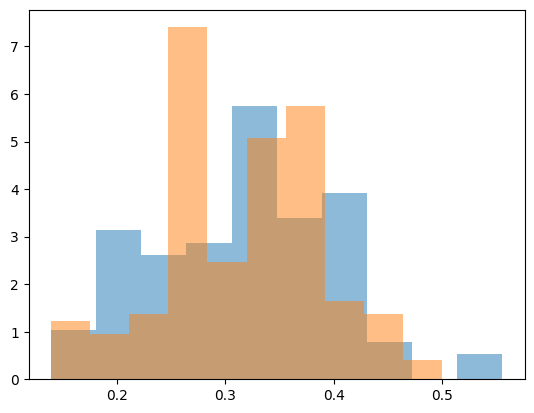

In [158]:
plt.hist(juntos[juntos.real == 1].probabilidades_knn, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_knn, density=True, alpha=0.5, bins=10)
plt.show()

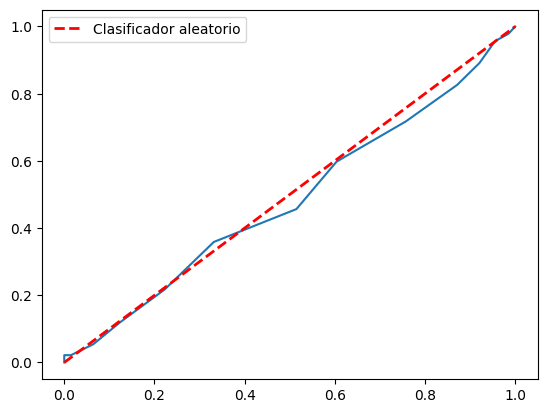

In [159]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_knn, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


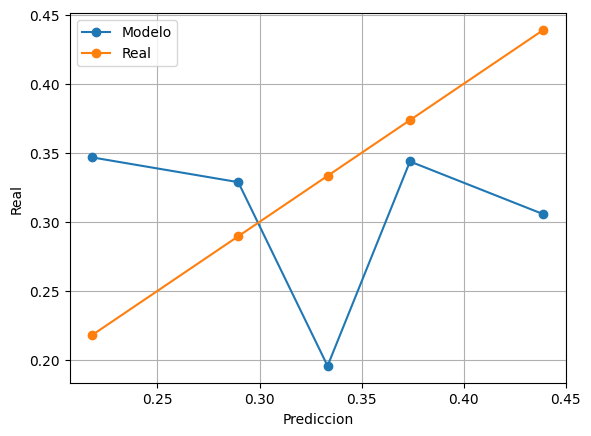

In [160]:
calibracion(probabilidades_knn, y_test, 5)

In [161]:
print('AUC RandomSearch con 36 neighbors:',roc_auc_score(y_true=y_test,y_score= probabilidades_knn ))

AUC RandomSearch con 36 neighbors: 0.48380327163151093


##### - Gridsearch

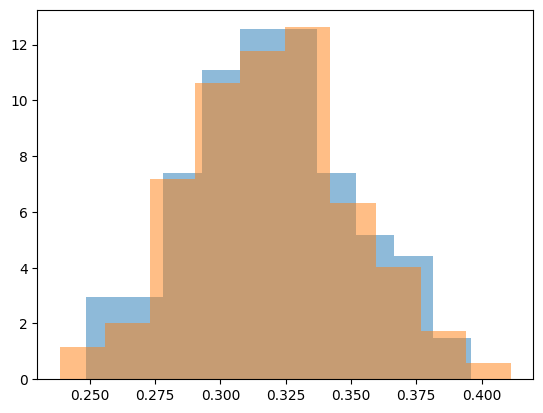

In [162]:
plt.hist(juntos[juntos.real == 1].probabilidades_knn2, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_knn2, density=True, alpha=0.5, bins=10)
plt.show()

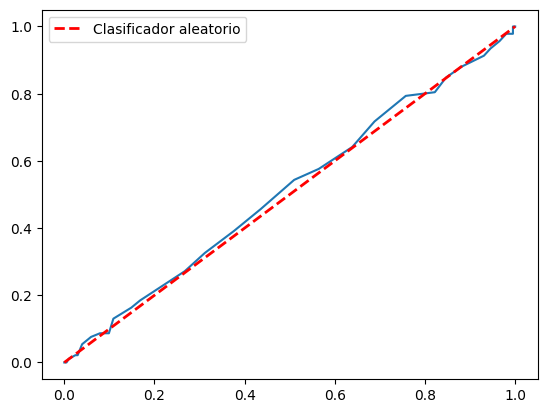

In [163]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_knn2, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


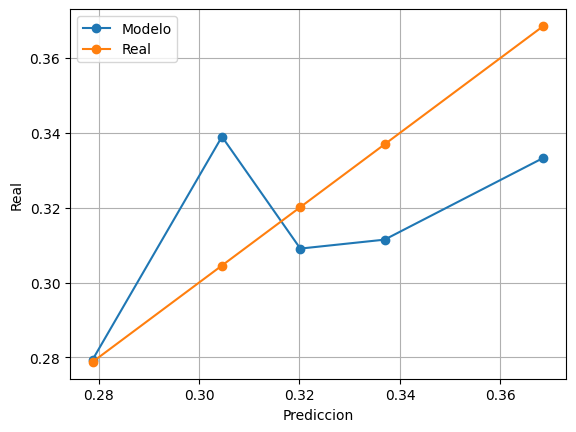

In [164]:
calibracion(probabilidades_knn2, y_test, 5)

In [165]:
print('AUC Gridsearch con 36 neighbors:',roc_auc_score( y_true=y_test, y_score= probabilidades_knn2))

AUC Gridsearch con 36 neighbors: 0.5111924235901851


#### **Regresión Logistica**

---

##### - RandomSearch

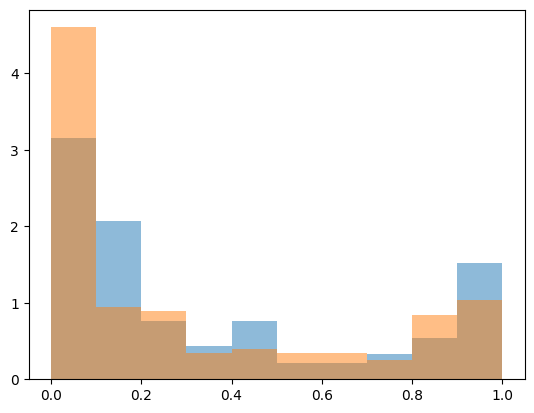

In [166]:
plt.hist(juntos[juntos.real == 1].logisticarandom, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logisticarandom, density=True, alpha=0.5, bins=10)
plt.show()

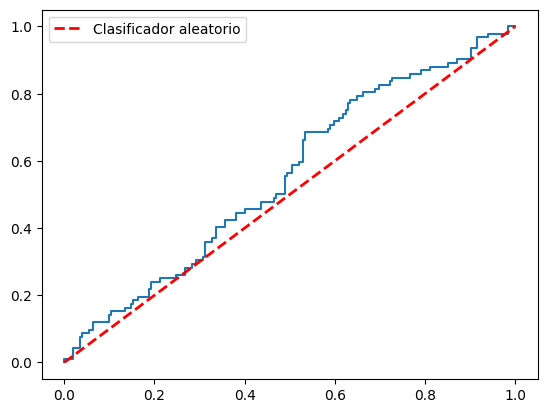

In [167]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_logisticarandom, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


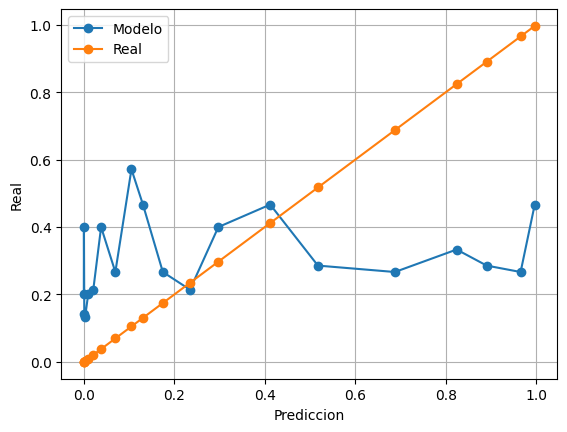

In [168]:
calibracion(probabilidades_logisticarandom, y_test, 20)

In [169]:
log_reg_random.best_params_

{'poly__degree': 2, 'logreg__C': 1}

In [170]:
print('AUC: ',roc_auc_score(y_score= probabilidades_logisticarandom, y_true=y_test))

AUC:  0.5539711579853638


##### - Gridsearch

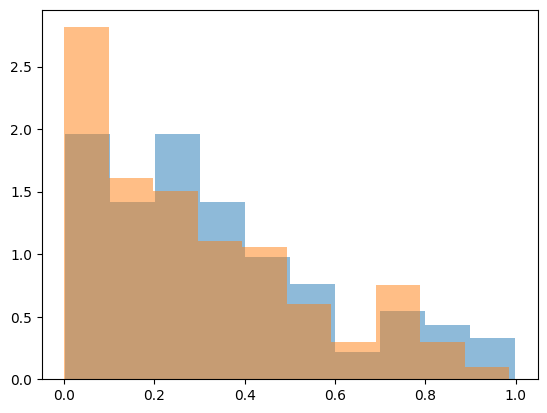

In [171]:
plt.hist(juntos[juntos.real == 1].logisticagrid, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logisticagrid, density=True, alpha=0.5, bins=10)
plt.show()

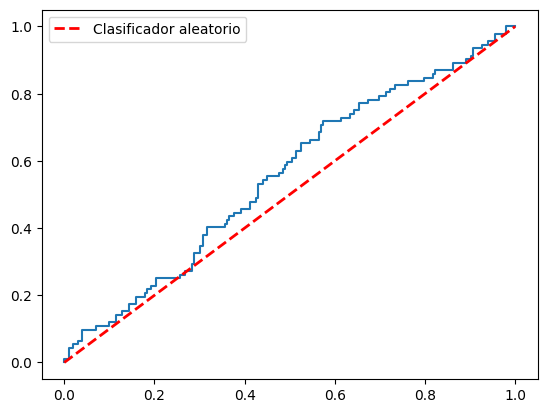

In [172]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_logisticagrid, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


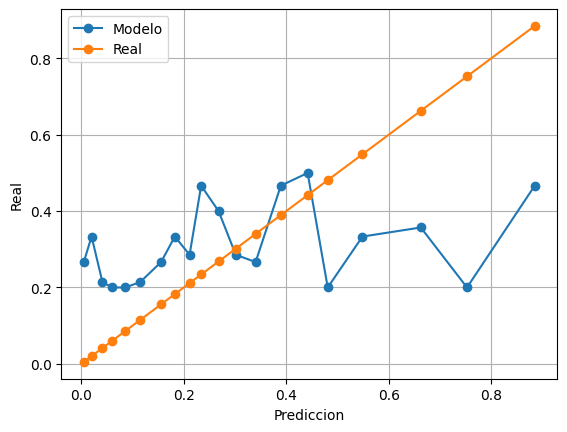

In [173]:
calibracion(probabilidades_logisticagrid, y_test, 20)

In [174]:
log_reg_grid.best_params_

{'logreg__C': 0.1, 'poly__degree': 2}

In [175]:
print('AUC: ',roc_auc_score(y_score= probabilidades_logisticagrid, y_true=y_test))

AUC:  0.5540787774429616


#### **Red Neuronal**
---

##### - RandomSearch

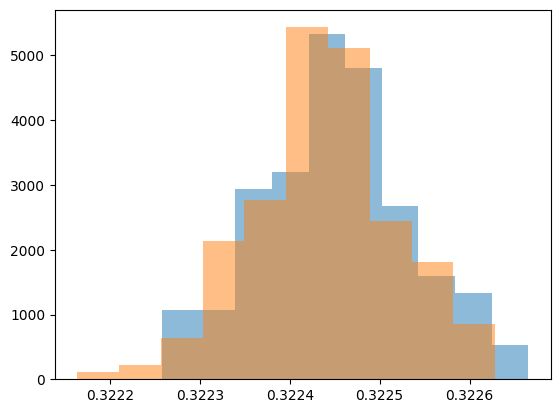

In [176]:
plt.hist(juntos[juntos.real == 1].NeuroRandom, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].NeuroRandom, density=True, alpha=0.5, bins=10)
plt.show()

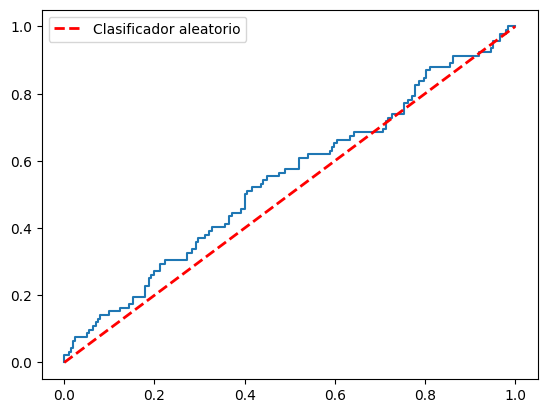

In [177]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_neurorandom, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

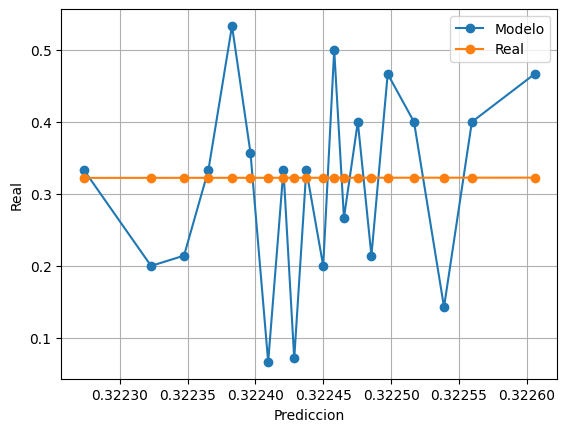

In [178]:
calibracion(probabilidades_neurorandom, y_test, 20)

In [179]:
print('AUC RandomSearch:', roc_auc_score(y_score=probabilidades_neurorandom, y_true=y_test))

AUC RandomSearch: 0.5429401635815755


##### - Gridsearch

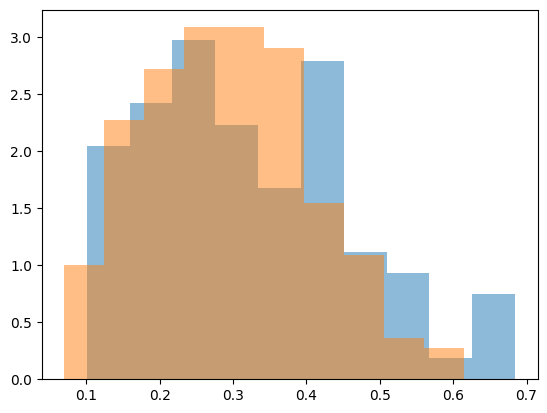

In [180]:
plt.hist(juntos[juntos.real == 1].NeuroGrid, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].NeuroGrid, density=True, alpha=0.5, bins=10)
plt.show()

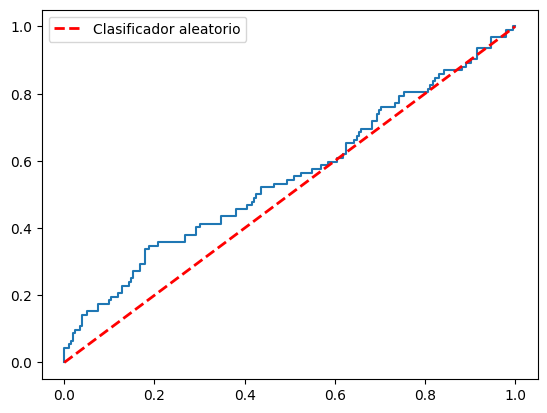

In [181]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_neurogrid, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

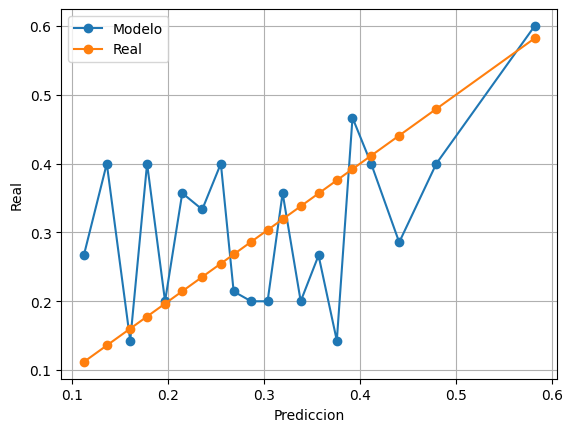

In [182]:
calibracion(probabilidades_neurogrid, y_test, 20)

In [183]:
print('AUC Gridsearch:', roc_auc_score(y_score=probabilidades_neurogrid, y_true=y_test))

AUC Gridsearch: 0.5527873439517865


##### **Discriminante Lineal**

---

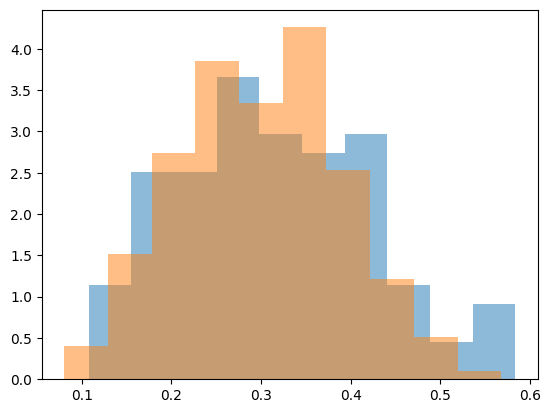

In [184]:
plt.hist(juntos[juntos.real == 1].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.show()

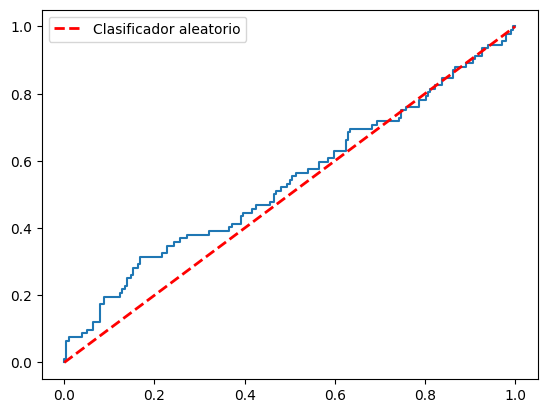

In [185]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo_disc, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

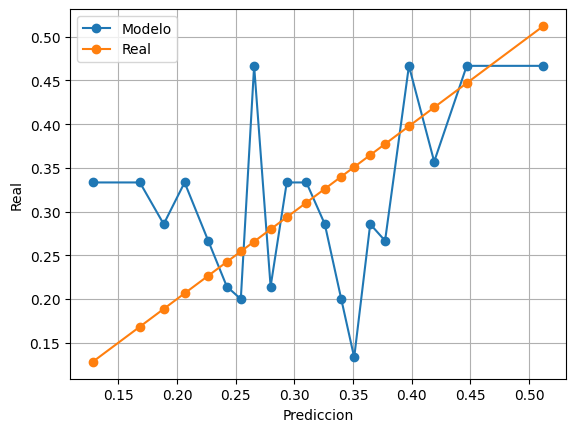

In [186]:
calibracion(probabilidades_modelo_disc, y_test, 20)

In [187]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo_disc, y_true=y_test))

AUC:  0.5391196728368489


##### Juntos

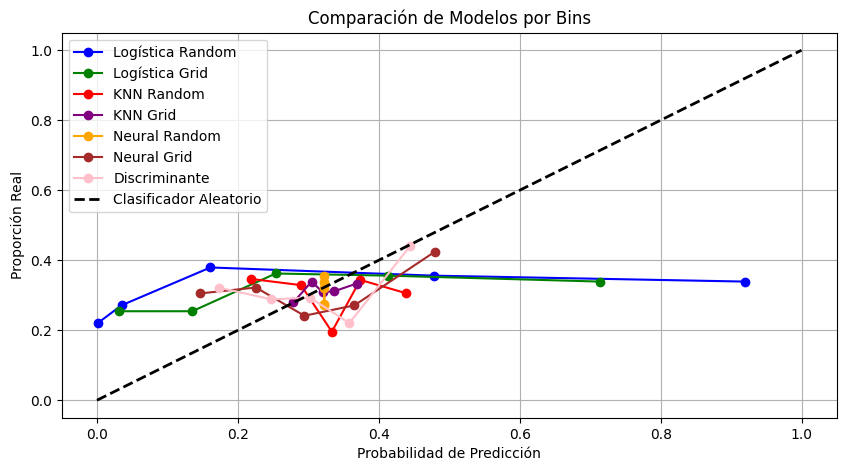

In [188]:
import matplotlib.pyplot as plt

# Definir los colores para las líneas
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black']

# Crear la figura
plt.figure(figsize=(10, 5))

# Regresión Logística 
plt.plot(grouped_log1.logisticarandom, grouped_log1.real, marker='o', label='Logística Random', color=colors[0])
plt.plot(grouped_log2.logisticagrid, grouped_log2.real, marker='o', label='Logística Grid', color=colors[1])

# KNN
plt.plot(grouped_knn1.probabilidades_knn, grouped_knn1.real, marker='o', label='KNN Random', color=colors[2])
plt.plot(grouped_knn2.probabilidades_knn2, grouped_knn2.real, marker='o', label='KNN Grid', color=colors[3])

# Neuronal
plt.plot(grouped_neuralrand.NeuroRandom, grouped_neuralrand.real, marker='o', label='Neural Random', color=colors[4])
plt.plot(grouped_neuralgrid.NeuroGrid, grouped_neuralgrid.real, marker='o', label='Neural Grid', color=colors[5])

#Discriminante
plt.plot(grouped_disc.probabilidades_disc, grouped_disc.real, marker='o', label='Discriminante', color=colors[6])

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, label='Clasificador Aleatorio', color=colors[-1])


plt.legend()
plt.grid()
plt.xlabel('Probabilidad de Predicción')
plt.ylabel('Proporción Real')
plt.title('Comparación de Modelos por Bins')

# Mostrar el gráfico
plt.show()



### Interpretación de los coeficientes

##### **Regresión Logistica** 

---

##### - RandomSearch

In [189]:
var = log_reg_random.best_estimator_.named_steps['poly'].get_feature_names_out(X_train.columns)
coef = log_reg_random.best_estimator_.named_steps['logreg'].coef_[0]
n_var = 5
model_coeficients = pd.DataFrame({
          'Variable': var,
          'Coeficiente': coef
})
model_coeficients = model_coeficients.sort_values(by='Coeficiente', ascending=False).head(n_var)

model_coeficients

,Variable,Coeficiente
837,Attrition_Yes Gender_Male,1.302332
353,JobLevel YearsSinceLastPromotion,1.182673
1063,JobRole_Research Scientist MaritalStatus_Single,1.153575
802,YearsSinceLastPromotion MaritalStatus_Single,1.080558
688,TrainingTimesLastYear EducationField_Other,1.046391


Las 5 variables con mayor coeficiente en la Regresión Logística con RandomSearch son:

`Attrition_Yes Gender_Male` → 1.302332

Esto indica que, si una persona experimenta la deserción (attrition) y es masculina, se espera un aumento de 1.302332 en los log-odds de que el evento ocurra.

`JobLevel YearsSinceLastPromotion` → 1.182673

Esto indica que, por cada incremento en el nivel de JobLevel y el número de años desde la última promoción, se espera un aumento de 1.182673 en los log-odds. 

`JobRole_Research Scientist MaritalStatus_Single` → 1.153575

Si una persona trabaja como Investigador Científico y está soltera, se espera un aumento de 1.153575 en los log-odds de que el evento ocurra.

`YearsSinceLastPromotion MaritalStatus_Single` → 1.080558

Esto indica que, por cada incremento en los años desde la última promoción y si la persona está soltera, se espera un aumento de 1.080558 en los log-odds. 

`TrainingTimesLastYear EducationField_Other` → 1.046391

Esto indica que, si una persona ha recibido un mayor número de horas de entrenamiento el año pasado y pertenece al campo de Educación en otras áreas, se espera un aumento de 1.046391 en los log-odds de que el evento ocurra. 

##### - GridSearch

In [190]:
var = log_reg_grid.best_estimator_.named_steps['poly'].get_feature_names_out(X_train.columns)
coef = log_reg_grid.best_estimator_.named_steps['logreg'].coef_[0]
n_var = 5
model_coeficients = pd.DataFrame({
          'Variable': var,
          'Coeficiente': coef
})
model_coeficients = model_coeficients.sort_values(by='Coeficiente', ascending=False).head(n_var)

model_coeficients

,Variable,Coeficiente
1063,JobRole_Research Scientist MaritalStatus_Single,0.434237
442,MonthlyRate JobRole_Manufacturing Director,0.394739
802,YearsSinceLastPromotion MaritalStatus_Single,0.367111
688,TrainingTimesLastYear EducationField_Other,0.361937
1076,MaritalStatus_Married OverTime_Yes,0.348071


Viendo que los coeficientes son iguales en los resultados obtenidos por RandomSearch y GridSearch, las 5 variables con mayor coeficiente en la Regresión Logística son:

`JobRole_Research Scientist MaritalStatus_Single	` → 0.434237

Esto indica que, si una persona trabaja como Investigador Científico y está soltera, se espera un aumento de 0.434237 en los log-odds de que el evento ocurra. 

`MonthlyRate JobRole_Manufacturing Director	` → 0.394739

Esto indica que, si una persona tiene una tasa mensual más alta y ocupa el cargo de Director de Manufactura, se espera un aumento de 0.394739 en los log-odds. 

`YearsSinceLastPromotion MaritalStatus_Single	` → 0.367111

Esto indica que, por cada incremento en los años desde la última promoción y si la persona está soltera, se espera un aumento de 0.367111 en los log-odds

`TrainingTimesLastYear EducationField_Other	` → 0.361937

Esto indica que, si una persona ha recibido un mayor número de horas de formación el año pasado y pertenece al campo de Educación en áreas no específicas, se espera un aumento de 0.361937 en los log-odds. 

`MaritalStatus_Married OverTime_Yes	` → 0.348071

Esto implica que, si una persona está casada y trabaja horas extras, se espera un aumento de 0.348071 en los log-odds. 

#### AUC Modelos

---

In [191]:
AUC = pd.DataFrame({
    'knn_random': [roc_auc_score(y_score=probabilidades_knn, y_true=y_test)],
    'knn_grid': [roc_auc_score(y_score=probabilidades_knn2, y_true=y_test)],
    'RL_random': [roc_auc_score(y_score=probabilidades_logisticarandom, y_true=y_test)],
    'RL_grid': [roc_auc_score(y_score=probabilidades_logisticagrid, y_true=y_test)],
    'R.Neuronal_random': [roc_auc_score(y_score=probabilidades_neurorandom, y_true=y_test)],
    'R.Neuronal_grid': [roc_auc_score(y_score=probabilidades_neurogrid, y_true=y_test)],
    'Analisis del discriminante lineal': [roc_auc_score(y_score=probabilidades_modelo_disc, y_true=y_test)],
    
})

print('AUC:')
AUC

AUC:


,knn_random,knn_grid,RL_random,RL_grid,R.Neuronal_random,R.Neuronal_grid,Analisis del discriminante lineal
0,0.483803,0.511192,0.553971,0.554079,0.54294,0.552787,0.53912


Tras calcular los modelos sin aplicar Feature Engineering, el mejor desempeño en AUC lo obtuvo el modelo de Regresión Lógistica con GridSearch, alcanzando un valor de 0.554079. Aunque este resultado no es óptimo, sigue siendo el más efectivo en la distinción de clases comparado con los otros modelos. En términos prácticos, esto sugiere que el modelo tiene un 55.4079% de probabilidad de predecir correctamente si un usuario está satisfecho (`is_satisfied`). Sin embargo, esto indica que aún hay alto margen de mejora , podemos decir si aplicamos feature engineering u otra cosa , podríamos llegar a mejorar el modelo y en su distincón de clases.

Para interpretar los coeficientes de la Regresión Logistica 


Veremos si aplicando Feature Engineering logramos mejorar el modelo...

### **Modelos con Feature Engineering**

#### Feature Engineering

In [ ]:
df.corr()['Attrition_Yes'].sort_values(ascending=False)

is_satisfied                         1.000000
EducationField_Life Sciences         0.044076
PercentSalaryHike                    0.042461
Gender_Male                          0.040752
OverTime_Yes                         0.039452
JobRole_Sales Executive              0.036071
PerformanceRating                    0.034319
MaritalStatus_Single                 0.032247
Department_Sales                     0.024711
BusinessTravel_Travel_Frequently     0.024431
StockOptionLevel                     0.023456
EnvironmentSatisfaction              0.017072
JobRole_Research Scientist           0.014072
TrainingTimesLastYear                0.010379
EducationField_Other                 0.008929
JobRole_Manager                      0.006649
EducationField_Marketing             0.006395
DailyRate                           -0.000695
JobRole_Laboratory Technician       -0.003358
MonthlyIncome                       -0.004324
YearsInCurrentRole                  -0.004955
YearsAtCompany                    

In [193]:
df.drop('StandardHours', axis=1, inplace=True)

In [194]:
numeric_features = [col for col in X.columns if X[col].dtype in ['float64']]
categorical_features = [col for col in X.columns if X[col].dtype not in ['float64']]

In [196]:
pd.DataFrame(df.isnull().sum()).T

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,OverTime_Yes*EnvironmentSatisfaction,PercentSalaryHike/Department_Sales,Log_PercentS,Log_OverTime_Yes,MonthlyRate^2,PercentSalaryHike^2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
target= 'Attrition_Yes'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### **KNN Clasificador**
---

In [198]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param = {
    'knn__n_neighbors': np.arange(1,50), 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'] 
}


##### - Random Search

In [199]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param, n_iter=200, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)


random_search.best_params_
probabilidades_knn = random_search.predict_proba(X_test)[:, 1]

print(random_search.best_params_)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 196 is smaller than n_iter=200. Running 196 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'knn__weights': 'uniform', 'knn__n_neighbors': np.int64(46), 'knn__metric': 'euclidean'}


##### - Gridsearch

In [200]:
grid_search = GridSearchCV(pipeline, param, cv=5, n_jobs=-1, scoring='roc_auc')

grid_search.fit(X_train, y_train)

probabilidades_knn2 = grid_search.predict_proba(X_test)[:, 1]


#### **Regresión Logística**
---

In [201]:
# Pipeline 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500, random_state=42))
])

params_grid= {
    'poly__degree': [1, 2, 3],
    'logreg__C': ['l2', None],
    'logreg__C': [0.01,0.1,1]
}

##### RandomSearch


In [202]:
log_reg_random= RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=5, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_random.fit(X_train, y_train)

probabilidades_logisticarandom = log_reg_random.best_estimator_.predict_proba(X_test)[:,1]

##### - Gridsearch

In [203]:
log_reg_grid= GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

probabilidades_logisticagrid = log_reg_grid.best_estimator_.predict_proba(X_test)[:,1]


#### **Red Neuronal**

---

In [204]:
# Pipeline
pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier())
])

params= {
    'nn__hidden_layer_sizes': [(100,100),(100,100,100),(100,100,100,100)], 
    'nn__activation':['relu', 'tanh', 'logistic'],
    'nn__alpha': [0.01,0.1,1],
}

##### - RandomSearch

In [205]:

neuro_random = RandomizedSearchCV(estimator=pipeline, param_distributions=params, n_iter=5, cv=5, n_jobs=-1, scoring='roc_auc')
neuro_random.fit(X_train, y_train)

probabilidades_neurorandom = neuro_random.best_estimator_.predict_proba(X_test)[:, 1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### - Gridsearch

In [206]:
grid_neuro= GridSearchCV(estimator=pipeline, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_neuro.fit(X_train, y_train)
probabilidades_neurogrid = grid_neuro.best_estimator_.predict_proba(X_test)[:, 1]

#### **Analisis de Discriminante Lineal**
---

In [207]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('model', discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)
probabilidades_modelo_disc = pipeline.predict_proba(X_test)[:, 1]

#### **Juntos**

In [208]:
juntos = pd.DataFrame({
     'real': y_test,     
     'probabilidades_knn': probabilidades_knn,
     'probabilidades_knn2': probabilidades_knn2,
     'logisticarandom': probabilidades_logisticarandom,
     'logisticagrid': probabilidades_logisticagrid,
     'NeuroRandom': probabilidades_neurorandom,
     'NeuroGrid': probabilidades_neurogrid,
     'probabilidades_disc': probabilidades_modelo_disc

})

juntos.head()

,real,probabilidades_knn,probabilidades_knn2,logisticarandom,logisticagrid,NeuroRandom,NeuroGrid,probabilidades_disc
515,False,0.260870,0.752900,0.348721,0.348721,0.367515,9.999715e-01,0.348272
306,False,0.391304,0.000000,0.428839,0.428839,0.516982,6.912813e-03,0.445853
1255,False,0.413043,0.494484,0.366142,0.366142,0.349066,8.635727e-05,0.384521
378,True,0.369565,0.244687,0.191885,0.191885,0.151672,7.744385e-08,0.176781
332,False,0.304348,0.233182,0.375037,0.375037,0.376337,9.981577e-01,0.385699


In [209]:
# Bins
bins = 5
juntos['bins_log1'] = pd.qcut(juntos['logisticarandom'], bins, labels=False) + 1
juntos['bins_log2'] = pd.qcut(juntos['logisticagrid'], bins, labels=False) + 1

juntos['bins_knn1'] = pd.qcut(juntos['probabilidades_knn'], bins, labels=False) + 1
juntos['bins_knn2'] = pd.qcut(juntos['probabilidades_knn2'], bins, labels=False, duplicates='drop') + 1
juntos['bins_neuralrand'] = pd.qcut(juntos['NeuroRandom'], bins, labels=False) + 1
juntos['bins_neuralgrid'] = pd.qcut(juntos['NeuroGrid'], bins, labels=False, duplicates='drop') + 1
juntos['bins_disc'] = pd.qcut(juntos['probabilidades_disc'], bins, labels=False) + 1

# Agrupaciones
grouped_log1 = juntos.groupby('bins_log1').mean()
grouped_log2 = juntos.groupby('bins_log2').mean()
grouped_knn1 = juntos.groupby('bins_knn1').mean()
grouped_knn2 = juntos.groupby('bins_knn2').mean()
grouped_neuralrand = juntos.groupby('bins_neuralrand').mean()
grouped_neuralgrid = juntos.groupby('bins_neuralgrid').mean()
grouped_disc = juntos.groupby('bins_disc').mean()


## **Histograma, Calibración, roc AUC y AUC por Modelo**

#### **KNN Clasificador**
---



##### - RandomSearch

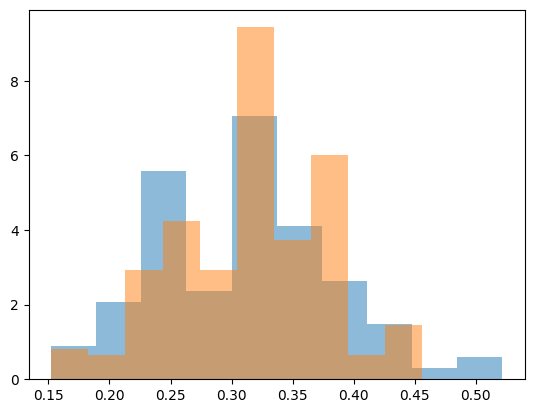

In [210]:
plt.hist(juntos[juntos.real == 1].probabilidades_knn, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_knn, density=True, alpha=0.5, bins=10)
plt.show()

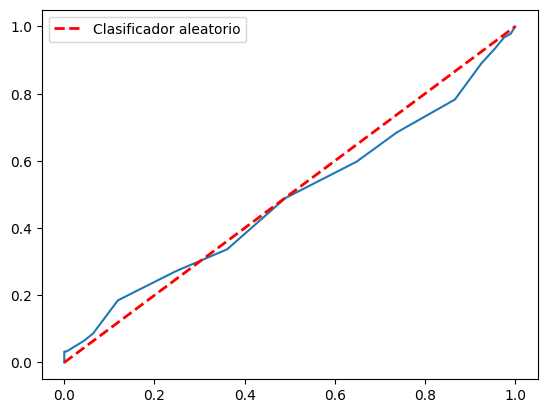

In [211]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_knn, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


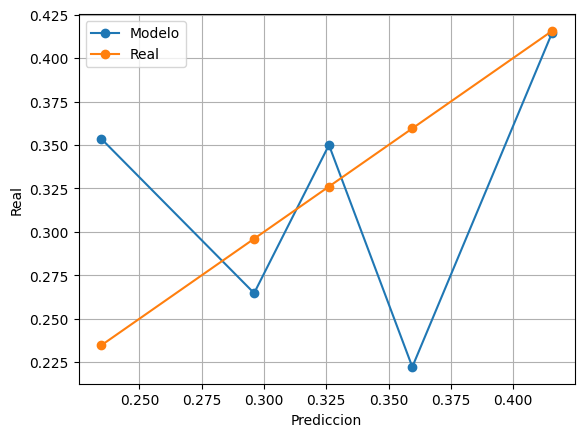

In [212]:
calibracion(probabilidades_knn, y_test, 5)

In [213]:
print('AUC RandomSearch: ',roc_auc_score(y_true=y_test,y_score= probabilidades_knn ))

AUC RandomSearch:  0.4857942315970727


##### - Gridsearch

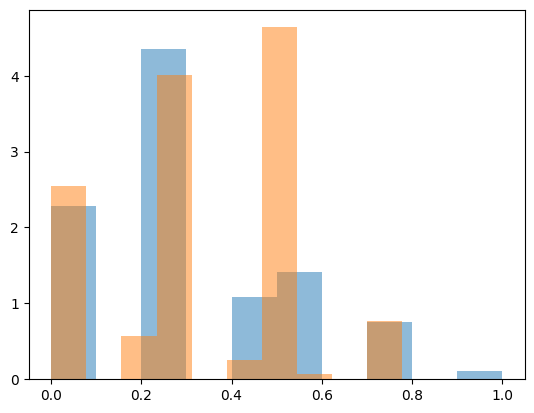

In [214]:
plt.hist(juntos[juntos.real == 1].probabilidades_knn2, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_knn2, density=True, alpha=0.5, bins=10)
plt.show()

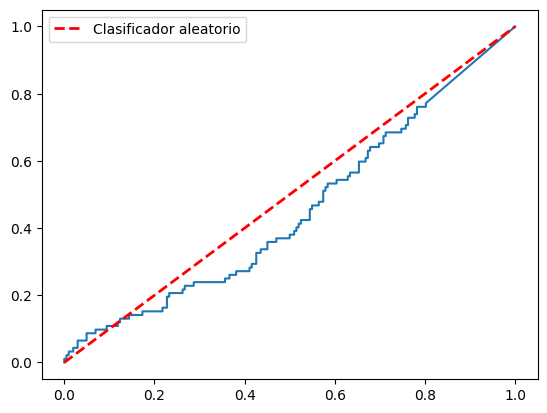

In [215]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_knn2, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


In [216]:
print('AUC Gridsearch: ',roc_auc_score( y_true=y_test, y_score= probabilidades_knn2))

AUC Gridsearch:  0.4508179078777443


#### **Regresión Logistica**

---

##### - RandomSearch

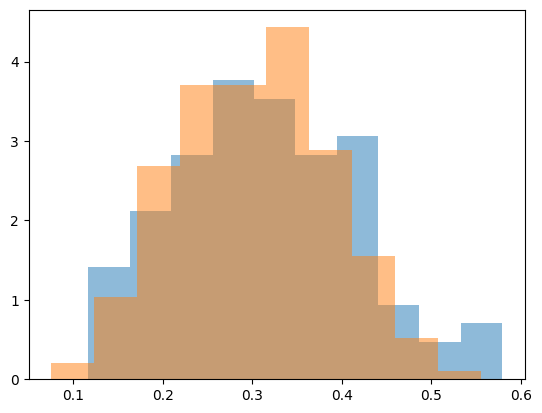

In [217]:
plt.hist(juntos[juntos.real == 1].logisticarandom, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logisticarandom, density=True, alpha=0.5, bins=10)
plt.show()

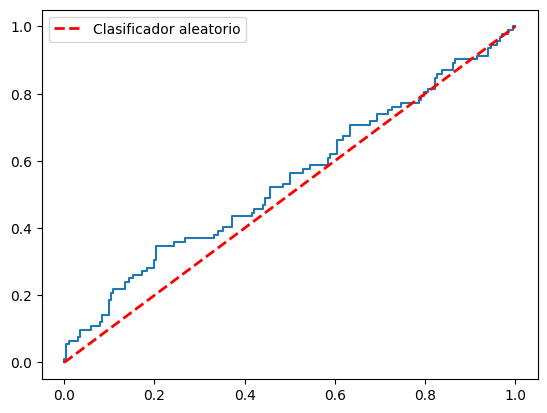

In [218]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_logisticarandom, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


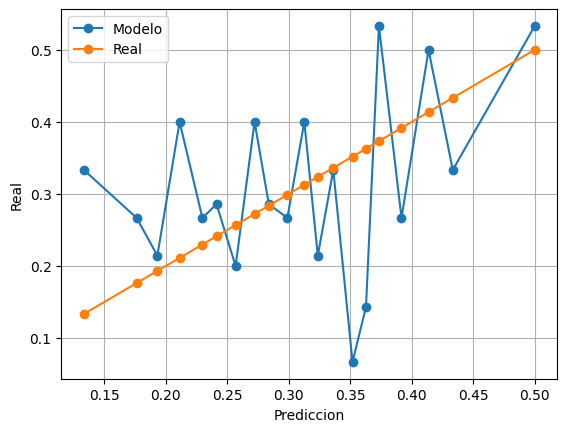

In [219]:
calibracion(probabilidades_logisticarandom, y_test, 20)

In [220]:
log_reg_random.best_params_

{'poly__degree': 1, 'logreg__C': 0.1}

In [221]:
print('AUC: ',roc_auc_score(y_score= probabilidades_logisticarandom, y_true=y_test))

AUC:  0.5435858803271632


##### - Gridsearch

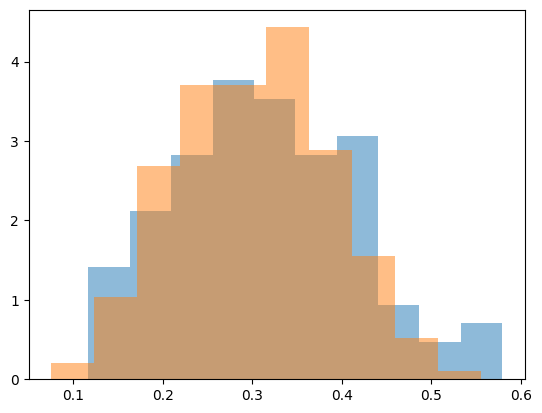

In [222]:
plt.hist(juntos[juntos.real == 1].logisticagrid, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logisticagrid, density=True, alpha=0.5, bins=10)
plt.show()

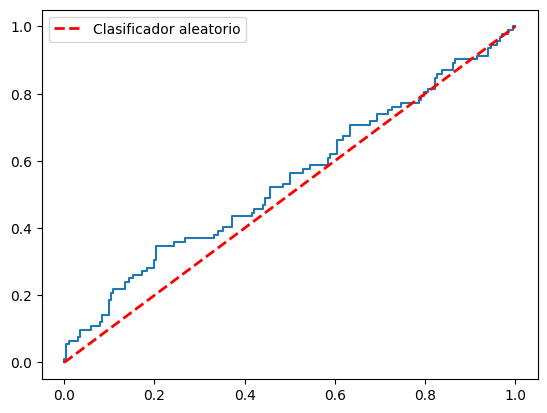

In [223]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_logisticagrid, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


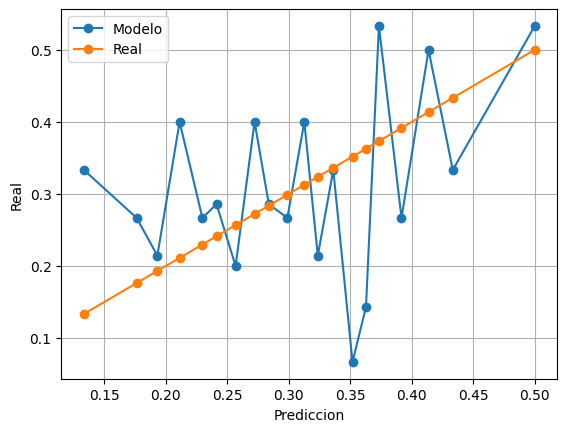

In [224]:
calibracion(probabilidades_logisticagrid, y_test, 20)

In [225]:
log_reg_grid.best_params_

{'logreg__C': 0.1, 'poly__degree': 1}

In [226]:
print('AUC: ',roc_auc_score(y_score= probabilidades_logisticagrid, y_true=y_test))

AUC:  0.5435858803271632


#### **Red Neuronal**
---

##### - RandomSearch

In [1]:
plt.hist(juntos[juntos.real == 1].NeuroRandom, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].NeuroRandom, density=True, alpha=0.5, bins=10)
plt.show()

NameError: name 'plt' is not defined

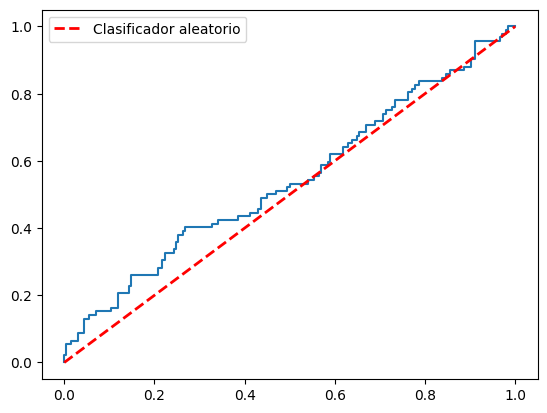

In [228]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_neurorandom, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

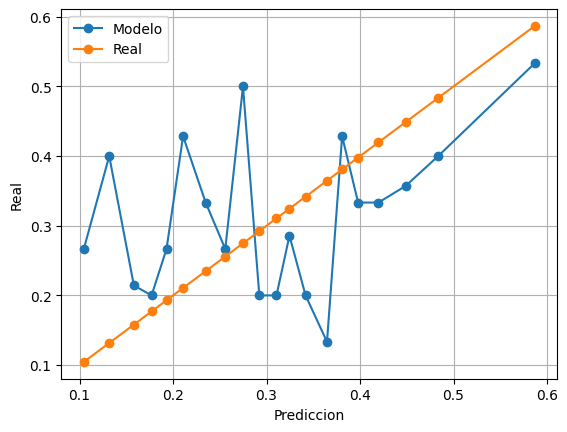

In [229]:
calibracion(probabilidades_neurorandom, y_test, 20)

In [230]:
print('AUC RandomSearch:', roc_auc_score(y_score=probabilidades_neurorandom, y_true=y_test))

AUC RandomSearch: 0.5418639690055962


##### - Gridsearch

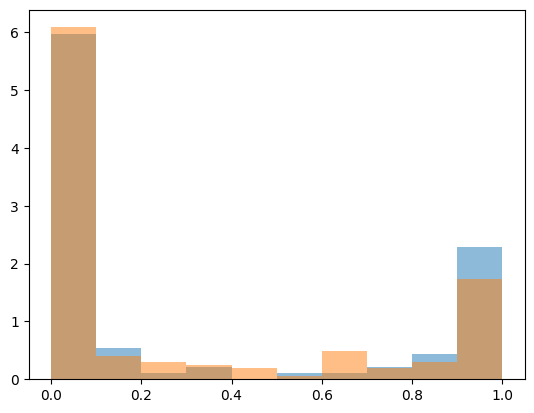

In [231]:
plt.hist(juntos[juntos.real == 1].NeuroGrid, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].NeuroGrid, density=True, alpha=0.5, bins=10)
plt.show()

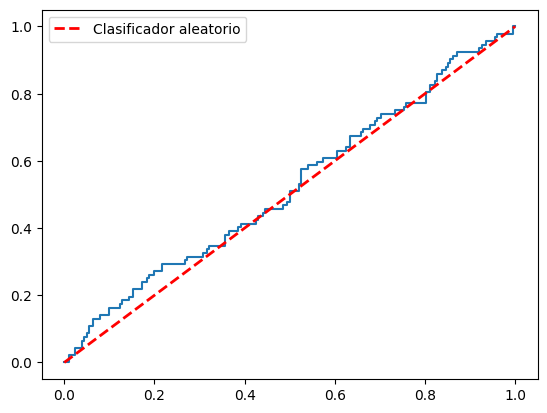

In [232]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_neurogrid, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

In [233]:
print('AUC Gridsearch:', roc_auc_score(y_score=probabilidades_neurogrid, y_true=y_test))

AUC Gridsearch: 0.5226000860955661


##### **Discriminante Lineal**

---

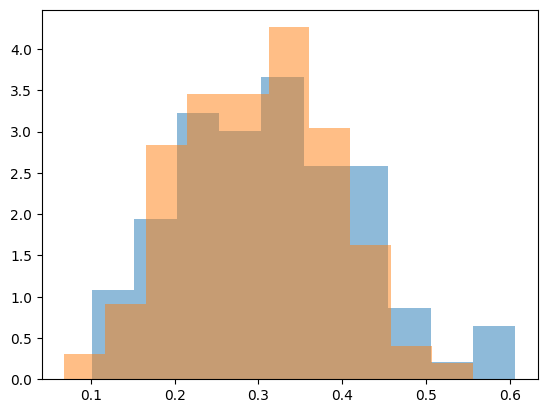

In [234]:
plt.hist(juntos[juntos.real == 1].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.show()

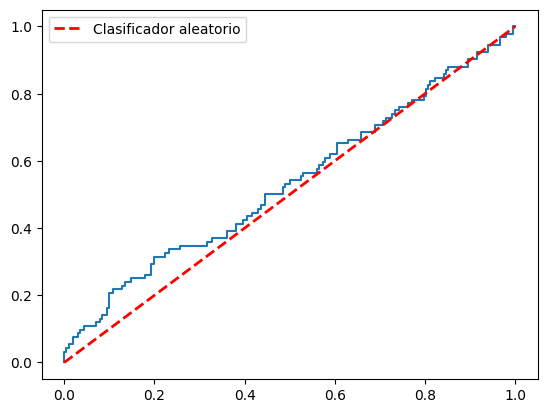

In [235]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo_disc, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

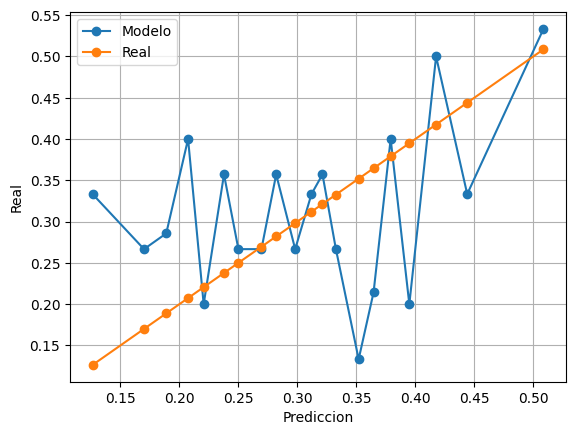

In [236]:
calibracion(probabilidades_modelo_disc, y_test, 20)

In [237]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo_disc, y_true=y_test))

AUC:  0.533953938872148


##### Juntos

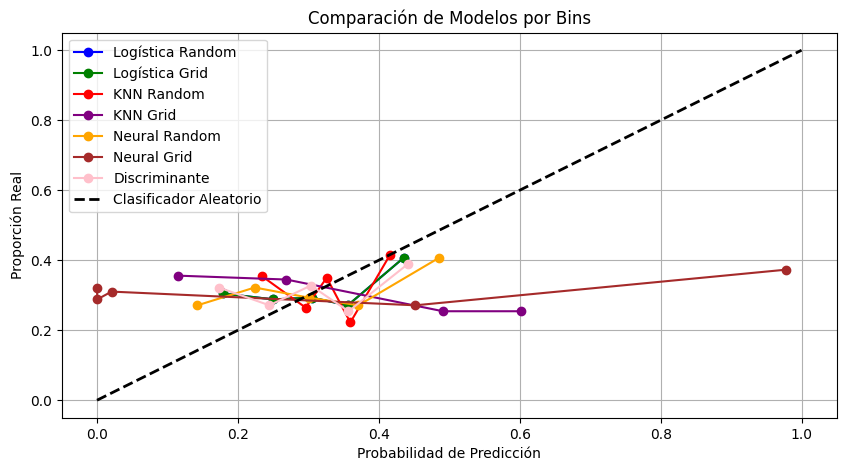

In [238]:
import matplotlib.pyplot as plt

# Definir los colores para las líneas
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black']

# Crear la figura
plt.figure(figsize=(10, 5))

# Regresión Logística 
plt.plot(grouped_log1.logisticarandom, grouped_log1.real, marker='o', label='Logística Random', color=colors[0])
plt.plot(grouped_log2.logisticagrid, grouped_log2.real, marker='o', label='Logística Grid', color=colors[1])

# KNN
plt.plot(grouped_knn1.probabilidades_knn, grouped_knn1.real, marker='o', label='KNN Random', color=colors[2])
plt.plot(grouped_knn2.probabilidades_knn2, grouped_knn2.real, marker='o', label='KNN Grid', color=colors[3])

# Neuronal
plt.plot(grouped_neuralrand.NeuroRandom, grouped_neuralrand.real, marker='o', label='Neural Random', color=colors[4])
plt.plot(grouped_neuralgrid.NeuroGrid, grouped_neuralgrid.real, marker='o', label='Neural Grid', color=colors[5])

#Discriminante
plt.plot(grouped_disc.probabilidades_disc, grouped_disc.real, marker='o', label='Discriminante', color=colors[6])

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, label='Clasificador Aleatorio', color=colors[-1])


plt.legend()
plt.grid()
plt.xlabel('Probabilidad de Predicción')
plt.ylabel('Proporción Real')
plt.title('Comparación de Modelos por Bins')

# Mostrar el gráfico
plt.show()



### Interpretación de los coeficientes

##### **Regresión Logistica** 

---

##### - RandomSearch

In [239]:
var = log_reg_random.best_estimator_.named_steps['poly'].get_feature_names_out(X_train.columns)
coef = log_reg_random.best_estimator_.named_steps['logreg'].coef_[0]
n_var = 5
model_coeficients = pd.DataFrame({
          'Variable': var,
          'Coeficiente': coef
})
model_coeficients = model_coeficients.sort_values(by='Coeficiente', ascending=False).head(n_var)

model_coeficients

,Variable,Coeficiente
23,BusinessTravel_Travel_Frequently,0.186854
42,MaritalStatus_Single,0.168809
24,BusinessTravel_Travel_Rarely,0.136995
14,StockOptionLevel,0.127915
32,Gender_Male,0.118368


##### - GridSearch

In [240]:
var = log_reg_grid.best_estimator_.named_steps['poly'].get_feature_names_out(X_train.columns)
coef = log_reg_grid.best_estimator_.named_steps['logreg'].coef_[0]
n_var = 5
model_coeficients = pd.DataFrame({
          'Variable': var,
          'Coeficiente': coef
})
model_coeficients = model_coeficients.sort_values(by='Coeficiente', ascending=False).head(n_var)

model_coeficients

,Variable,Coeficiente
23,BusinessTravel_Travel_Frequently,0.186854
42,MaritalStatus_Single,0.168809
24,BusinessTravel_Travel_Rarely,0.136995
14,StockOptionLevel,0.127915
32,Gender_Male,0.118368


Viendo que los coeficientes son iguales en los resultados obtenidos por RandomSearch y GridSearch, las 5 variables con mayor coeficiente en la Regresión Logística son:

`BusinessTravel_Travel_Frequently` → 0.186854

Esto indica que, al aumentar esta variable , se espera un aumento de 0.186854 en los log-odds de que el evento de interés ocurra.

`MaritalStatus_Single` → 0.168809

Esto indica que, si una persona pasa de estar casada o en una relación a estar soltera, se espera un aumento de 0.168809 en los log-odds de que el evento ocurra. Esto indica que ser soltero aumenta la probabilidad de que ocurra el evento.

`BusinessTravel_Travel_Rarely` → 0.136995

Esto indica que, si una persona viaja raramente , se espera un aumento de 0.136995 en los log-odds. Esto indica que las personas que viajan rara vez tienen una mayor probabilidad de que ocurra el evento en comparación con las que no viajan frecuentemente.

`StockOptionLevel` → 0.127915

Por cada incremento en el nivel de opciones sobre acciones , se espera un aumento de 0.127915 en los log-odds. Esto indica que un mayor nivel de opciones sobre acciones está asociado con una mayor probabilidad de que el evento ocurra.

`Gender_Male` → 0.118368

Esto implica que si una persona es masculina, se espera un aumento de 0.118368 en los log-odds. 

#### AUC Modelos Feature Engineering

---

In [241]:
AUC = pd.DataFrame({
    'knn_random': [roc_auc_score(y_score=probabilidades_knn, y_true=y_test)],
    'knn_grid': [roc_auc_score(y_score=probabilidades_knn2, y_true=y_test)],
    'RL_random': [roc_auc_score(y_score=probabilidades_logisticarandom, y_true=y_test)],
    'RL_grid': [roc_auc_score(y_score=probabilidades_logisticagrid, y_true=y_test)],
    'R.Neuronal_random': [roc_auc_score(y_score=probabilidades_neurorandom, y_true=y_test)],
    'R.Neuronal_grid': [roc_auc_score(y_score=probabilidades_neurogrid, y_true=y_test)],
    'Analisis del discriminante lineal': [roc_auc_score(y_score=probabilidades_modelo_disc, y_true=y_test)],
    
})

print('AUC:')
AUC

AUC:


,knn_random,knn_grid,RL_random,RL_grid,R.Neuronal_random,R.Neuronal_grid,Analisis del discriminante lineal
0,0.485794,0.450818,0.543586,0.543586,0.541864,0.5226,0.533954


Después de aplicar Feature Engineering, no se logró una mejora significativa en la capacidad de distinción de clases. Sin embargo, el modelo de Regresión Logística con Random Search obtuvo el mejor desempeño con Feature Engineering, alcanzando un AUC de 0.543586. Aunque este resultado sigue siendo limitado, indica que la Regresión Logística fue la opción más efectiva dentro de los modelos realizados. 

## Conclusión General

Tras evaluar los modelos sin aplicar Feature Engineering, el modelo de Regresión Logística con GridSearch mostró el mejor desempeño, alcanzando un AUC de 0.554079. Aunque este resultado no es óptimo, sigue siendo el más efectivo en la distinción de clases en comparación con los otros modelos evaluados. Este AUC indica que el modelo tiene un 55.4079% de probabilidad de predecir correctamente si un usuario está satisfecho `is_satisfied`. Si bien el modelo presenta una capacidad moderada para distinguir entre las clases, hay un alto margen de mejora.

Al aplicar Feature Engineering, no se observó una mejora significativa en la distinción de clases. A pesar de esto, el modelo de Regresión Logística con Random Search obtuvo el mejor desempeño con un AUC de 0.543586, lo que sigue siendo un resultado limitado. Sin embargo, esta evaluación confirma que la Regresión Logística fue la opción más efectiva dentro de los modelos realizados.

Es importante resaltar que el modelo de Regresión Logística con GridSearch sin aplicar Feature Engineering sigue siendo el que mejor distinguió las clases, con un AUC de 0.554079. Aunque este valor sigue siendo bajo, sigue siendo el mejor desempeño entre todos los modelos evaluados en este examen. En términos generales, un AUC de 0.554079 es considerado bajo, ya que indica que el modelo tiene dificultades para distinguir correctamente entre las clases. Esto sugiere que es necesario ajustar el modelo y explorar otras variables o transformaciones que puedan mejorar la predicción.

En cuanto a la interpretación de los coeficientes de la Regresión Logística, se puede deducir que por cada aumento en el coeficiente de las variables, se espera un aumento en los Log-Odds.